In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [447]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [448]:
from sklearn.tree import DecisionTreeRegressor

In [449]:
df = pd.read_csv("house_price_regression_dataset.csv")

In [484]:
df.shape

(1000, 8)

In [450]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [451]:
df.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


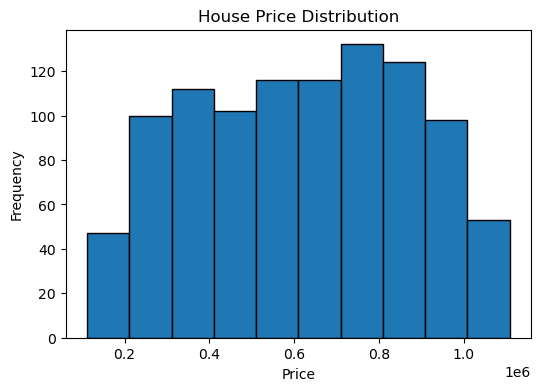

In [452]:
# Grafik 1: House Price Histogram
plt.figure(figsize=(6,4))
plt.hist(df["House_Price"], bins=10, edgecolor="black")
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

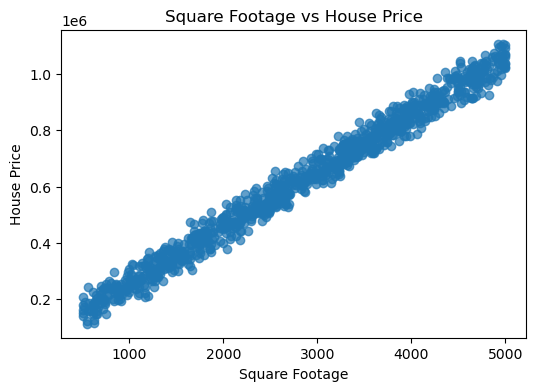

In [453]:
# Grafik 2: Scatter plot - Square Footage vs House Price
plt.figure(figsize=(6,4))
plt.scatter(df["Square_Footage"], df["House_Price"], alpha=0.7)
plt.title("Square Footage vs House Price")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.show()

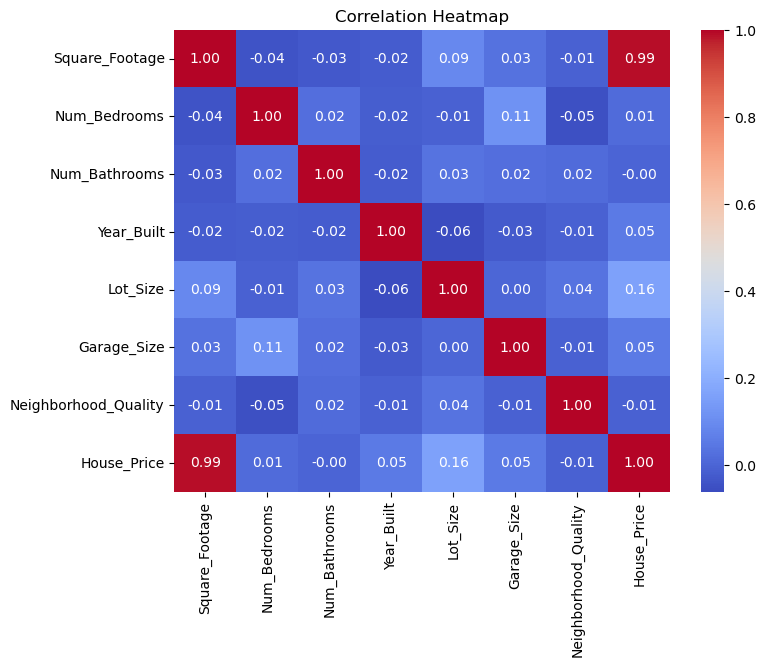

In [454]:
# Grafik 3: Korelasyon Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [455]:
df.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [457]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [458]:
numeric_cols1 = df.columns

In [459]:
type(numeric_cols1)

pandas.core.indexes.base.Index

In [460]:
numeric_cols = ["Square_Footage","Num_Bedrooms","Num_Bathrooms","Year_Built","Lot_Size","Garage_Size","Neighborhood_Quality","House_Price"]

In [461]:
X = df.drop("House_Price",axis=1)
y= df["House_Price"]

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [463]:
from sklearn.preprocessing import StandardScaler

In [464]:
scaler = StandardScaler()

In [465]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mean Absolute Error:  7389.053484137707
Mean Squared Error:  87055497.18318354
R2 Score:  0.9985535618636782


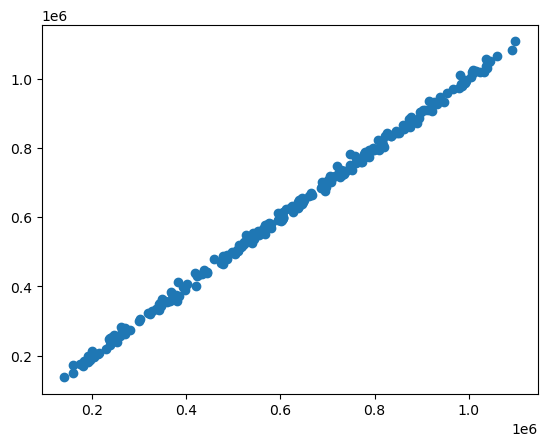

In [466]:
# linear regression
from sklearn.linear_model import LinearRegression


param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}


grid = GridSearchCV(LinearRegression(), param_grid,cv=5, refit = True,verbose = 3,n_jobs=-1,scoring='r2') 


grid.fit(X_train_scaled, y_train)
y_pred1 = grid.predict(X_test_scaled)

mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
score1 = r2_score(y_test, y_pred1)

print("Mean Absolute Error: ", mae1)
print("Mean Squared Error: ", mse1)
print("R2 Score: ", score1)
plt.scatter(y_test, y_pred1)
plt.show()

# default linear regression
#Mean Absolute Error:  7389.053484137743
#Mean Squared Error:  87055497.18318403
#R2 Score:  0.9985535618636782

# with param grid 
#Mean Absolute Error:  7389.053484137707
#Mean Squared Error:  87055497.18318354
#R2 Score:  0.9985535618636782

In [467]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': True}

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mean Absolute Error:  7389.053455602471
Mean Squared Error:  87055496.36905256
R2 Score:  0.9985535618772051


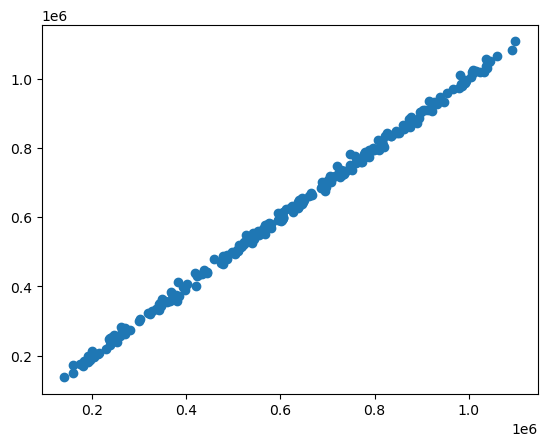

In [468]:
# lasso regression
from sklearn.linear_model import LinearRegression


param_grid = {
    'alpha': np.logspace(-4, 2, 20),
    'max_iter': [1000, 5000, 10000]
}


grid = GridSearchCV(Lasso(), param_grid,cv=5, refit = True,verbose = 3,n_jobs=-1,scoring='r2') 


grid.fit(X_train_scaled, y_train)
y_pred2 = grid.predict(X_test_scaled)

mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
score2 = r2_score(y_test, y_pred2)

print("Mean Absolute Error: ", mae2)
print("Mean Squared Error: ", mse2)
print("R2 Score: ", score2)
plt.scatter(y_test, y_pred2)
plt.show()

# default lasso regression
#Mean Absolute Error:  7388.9055925654975
#Mean Squared Error:  87052076.15136182
#R2 Score:  0.9985536187045562

# with param grid 
#Mean Absolute Error:  7389.053455602471
#Mean Squared Error:  87055496.36905256
#R2 Score:  0.9985535618772051

In [469]:
grid.best_params_

{'alpha': np.float64(0.00020691380811147902), 'max_iter': 1000}

Mean Absolute Error:  7398.301660868244
Mean Squared Error:  87262844.54285379
R2 Score:  0.998550116760977


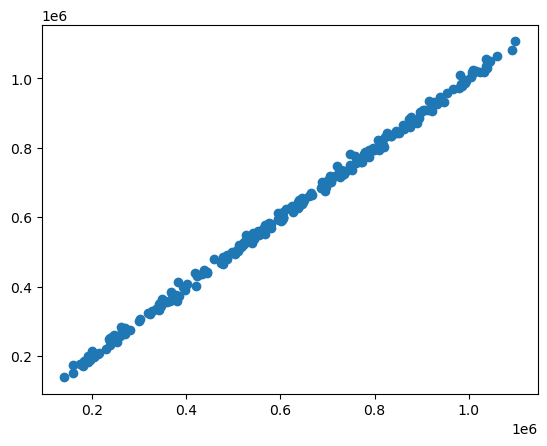

In [470]:
# Ridge

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred3 = ridge.predict(X_test_scaled)
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
score3 = r2_score(y_test, y_pred3)
print("Mean Absolute Error: ", mae3)
print("Mean Squared Error: ", mse3)
print("R2 Score: ", score3)
plt.scatter(y_test, y_pred3)
plt.show()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Mean Absolute Error:  7389.592567929789
Mean Squared Error:  87067023.8377484
R2 Score:  0.9985533703468494


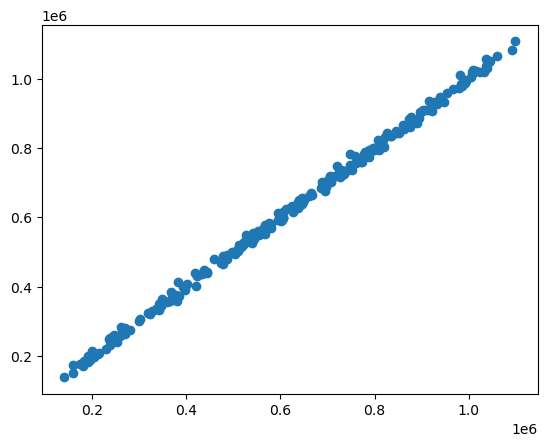

In [471]:
# ElasticNet

from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': np.logspace(-4, 2, 10),      # 0.0001 → 100 arası alpha
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1],  # L1-L2 karışımı
    'max_iter': [1000, 5000, 10000]
}

grid = GridSearchCV(ElasticNet(), param_grid,cv=5, refit = True,verbose = 3,n_jobs=-1,scoring='r2') # n_jobs=-1 means use all processor

grid.fit(X_train_scaled, y_train)
y_pred4 = grid.predict(X_test_scaled)

mae4 = mean_absolute_error(y_test, y_pred4)
mse4 = mean_squared_error(y_test, y_pred4)
score4 = r2_score(y_test, y_pred4)

print("Mean Absolute Error: ", mae4)
print("Mean Squared Error: ", mse4)
print("R2 Score: ", score4)
plt.scatter(y_test, y_pred4)
plt.show()

# default elastic regression
#Mean Absolute Error:  69371.29886758322
#Mean Squared Error:  6803466857.732396
#R2 Score:  0.8869595345424501

# with param grid 
#Mean Absolute Error:  7389.592567929789
#Mean Squared Error:  87067023.8377484
#R2 Score:  0.9985533703468494

In [472]:
# svm regression

In [473]:
param_grid = {'C': [500000],
              'gamma': ["scale"],
              'kernel': ['linear'],
              'degree':[1],
              'epsilon':[100],
              'cache_size':[100],
              'max_iter':[-1],
              'tol': [1e-3, 1e-4],
              'shrinking': [True]
             }

grid = GridSearchCV(SVR(), param_grid,cv=5, refit = True,verbose = 3,n_jobs=-1) # n_jobs=-1 means use all processor

grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [500000], 'cache_size': [100], 'degree': [1],
                         'epsilon': [100], 'gamma': ['scale'],
                         'kernel': ['linear'], 'max_iter': [-1],
                         'shrinking': [True], 'tol': [0.001, 0.0001]},
             verbose=3)

Mean Absolute Error:  7363.415043142864
Mean Squared Error:  87471136.77560964
R2 Score:  0.9985466559590898


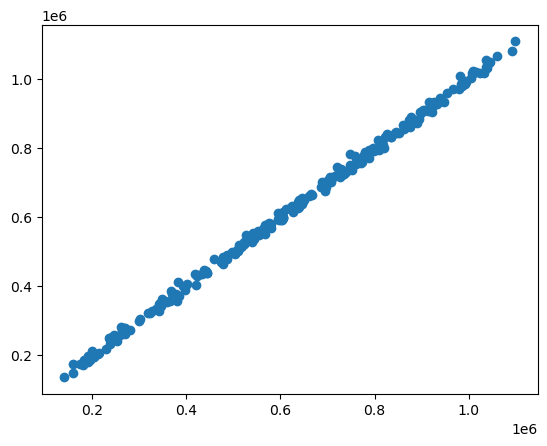

In [474]:
y_pred5 = grid.predict(X_test_scaled)
mae5 = mean_absolute_error(y_test, y_pred5)
mse5 = mean_squared_error(y_test, y_pred5)
score5 = r2_score(y_test, y_pred5)
print("Mean Absolute Error: ", mae5)
print("Mean Squared Error: ", mse5)
print("R2 Score: ", score5)
plt.scatter(y_test, y_pred5)
plt.show()

In [476]:
grid.best_params_

{'C': 500000,
 'cache_size': 100,
 'degree': 1,
 'epsilon': 100,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001}

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Mean Absolute Error:  25981.274270198315
Mean Squared Error:  1031096851.0902414
R2 Score:  0.9828681949340894


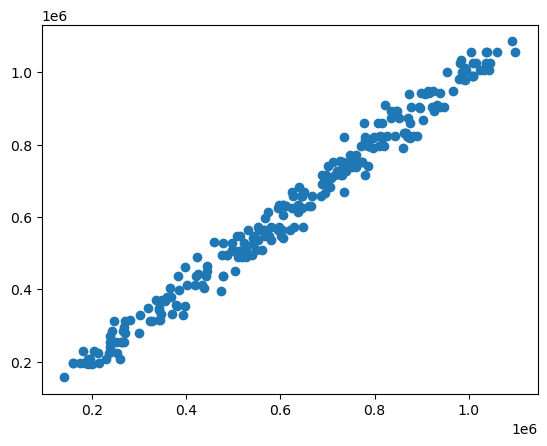

In [477]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid,cv=5, refit = True,verbose = 3,n_jobs=-1,scoring='r2') # n_jobs=-1 means use all processor

grid.fit(X_train_scaled, y_train)
y_pred6 = grid.predict(X_test_scaled)

mae6 = mean_absolute_error(y_test, y_pred6)
mse6 = mean_squared_error(y_test, y_pred6)
score6 = r2_score(y_test, y_pred6)

print("Mean Absolute Error: ", mae6)
print("Mean Squared Error: ", mse6)
print("R2 Score: ", score6)
plt.scatter(y_test, y_pred6)
plt.show()

# default decision tree regression
#Mean Absolute Error:  26447.06694712221
#Mean Squared Error:  1117979228.4937212
#R2 Score:  0.9814246332048828

# with param grid 
#Mean Absolute Error:  25981.274270198315
#Mean Squared Error:  1031096851.0902412
#R2 Score:  0.9828681949340894

In [478]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [479]:
maeList = [mae1,mae2,mae3,mae4,mae5,mae6]
mseList = [mse1,mse2,mse3,mse4,mse5,mse6]
scoreList = [score1,score1,score1,score4,score5,score6]

In [480]:
sorted(maeList,reverse=True)

[25981.274270198315,
 7398.301660868244,
 7389.592567929789,
 7389.053484137707,
 7389.053455602471,
 7363.415043142864]

In [481]:
sorted(mseList,reverse=True)

[1031096851.0902414,
 87471136.77560964,
 87262844.54285379,
 87067023.8377484,
 87055497.18318354,
 87055496.36905256]

In [482]:
sorted(scoreList,reverse=True)

[0.9985535618636782,
 0.9985535618636782,
 0.9985535618636782,
 0.9985533703468494,
 0.9985466559590898,
 0.9828681949340894]

In [483]:
print("\n Linear Regression Values \n","Mae :",mae1,"\n Mse :",mse2,"\n Score",score1)
print("\n Lasso Regression Values \n","Mae :",mae2,"\n Mse :",mse2,"\n Score",score2)
print("\n Ridge Regression Values \n","Mae :",mae3,"\n Mse :",mse3,"\n Score",score3)
print("\n Elastic Regression Values \n","Mae :",mae4,"\n Mse :",mse4,"\n Score",score4)
print("\n SVM Regression Values \n","Mae :",mae5,"\n Mse :",mse5,"\n Score",score5)
print("\n Decision Tree Regression Values \n","Mae :",mae6,"\n Mse :",mse6,"\n Score",score6)


 Linear Regression Values 
 Mae : 7389.053484137707 
 Mse : 87055496.36905256 
 Score 0.9985535618636782

 Lasso Regression Values 
 Mae : 7389.053455602471 
 Mse : 87055496.36905256 
 Score 0.9985535618772051

 Ridge Regression Values 
 Mae : 7398.301660868244 
 Mse : 87262844.54285379 
 Score 0.998550116760977

 Elastic Regression Values 
 Mae : 7389.592567929789 
 Mse : 87067023.8377484 
 Score 0.9985533703468494

 SVM Regression Values 
 Mae : 7363.415043142864 
 Mse : 87471136.77560964 
 Score 0.9985466559590898

 Decision Tree Regression Values 
 Mae : 25981.274270198315 
 Mse : 1031096851.0902414 
 Score 0.9828681949340894
